# MH of older workers, retirement age and working conditions

# Final datasets

Load libraries

In [1]:
import os
import sys

src_path = os.path.abspath("../")
sys.path.append(src_path)

from utils.common import *
from utils.ewcs import *
from utils.retirement import *
from utils.share import *

import_libraries()

Merge final SHARE and EWCS data to create different datasets

In [2]:
# 3 digits merge on year and country
merge_share_ewcs("3digits_year_country.csv", convert_to_3_digits=True)
# 3 digits on year only
merge_share_ewcs("3digits_year.csv", convert_to_3_digits=True, not_country_wise=True)
# 4 digits merge on year and country
merge_share_ewcs("4digits_year_country.csv", convert_to_3_digits=False)
# 4 digits on year only
merge_share_ewcs("4digits_year.csv", convert_to_3_digits=False, not_country_wise=True)

In [3]:
folder_path = (
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/"
)
files = os.listdir(folder_path)

for file in files:
    if file.startswith("3digits") or file.startswith("4digits"):
        file_path = os.path.join(folder_path, file)
        data = pd.read_csv(file_path)  # Read the CSV file
        unique_values = data[
            "mergeid"
        ].nunique()  # Count unique values in the 'mergeid' column
        print(f"{file[:-4]} : {unique_values} unique ids")

3digits_year_country : 2104 unique ids
4digits_year_country : 1795 unique ids
3digits_year : 2251 unique ids
4digits_year : 2226 unique ids


In [4]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_year_country.csv"
)

Number of unique IDs: 1795
Number of unique IDs by country:
country
Austria           111
Belgium           262
Czech Republic    122
Denmark           161
Estonia           324
France            182
Germany            22
Italy             106
Slovenia           88
Spain             109
Sweden             71
Switzerland       237
Name: mergeid, dtype: int64
Number of unique IDs by year:
year
2011    1336
2015    1470
Name: mergeid, dtype: int64

Demographics:
           age   gender  nb_children  yrseducation
count  2806.00  2806.00      2806.00       2806.00
mean     56.16     0.59         1.86         12.54
std       3.20     0.49         1.35          4.45
min      50.00     0.00         0.00          0.00
25%      54.00     0.00         1.00         11.00
50%      56.00     1.00         2.00         13.00
75%      58.00     1.00         3.00         15.00
max      66.00     1.00        17.00         36.00


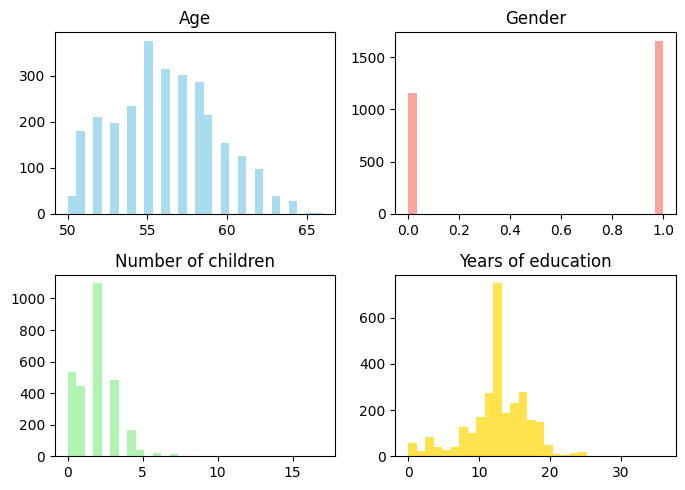


Job Status:
job_status
Employee                   0.35
Private sector employee    0.27
Public sector employee     0.21
Self-employed              0.10
Civil servant              0.08
Name: proportion, dtype: float64

Industry of Employment:
industry
Health and social work                          0.15
Education                                       0.14
Other community                                 0.13
Wholesale and retail trade                      0.11
Public administration and defence               0.11
Manufacturing                                   0.09
Construction                                    0.06
Transport, storage and communication            0.06
Financial intermediation                        0.04
Hotels and restaurants                          0.03
Agriculture, hunting, forestry, fishing         0.03
Real estate, renting and business activities    0.02
Electricity, gas and water supply               0.02
Other                                           0.01
Mining 

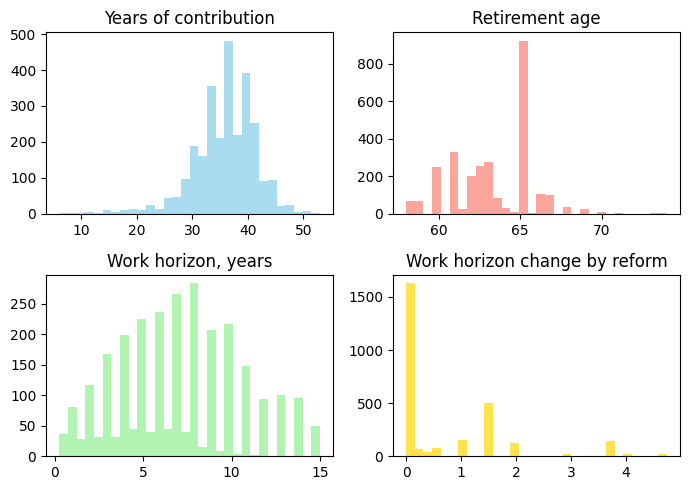


Physical Health and Chronic Diseases:
sphus2  chronic2
0       0           0.38
1       0           0.34
0       1           0.22
1       1           0.06
0       Refusal     0.00
Name: proportion, dtype: float64

Mental Health:
eurodcat
0    0.8
1    0.2
Name: proportion, dtype: float64
EuroD scale score:
eurod
0.0     697
1.0     664
2.0     518
3.0     372
4.0     267
5.0     138
6.0      76
7.0      48
8.0      10
9.0      10
10.0      5
12.0      1
Name: count, dtype: int64


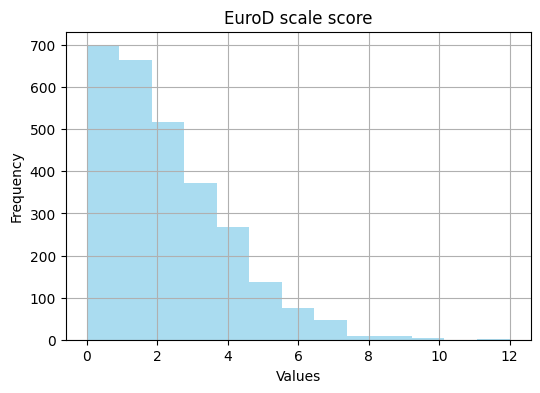


Working Conditions:
       jqi_monthly_earnings_pure  jqi_skills_discretion_pure  \
count                    2806.00                     2806.00   
mean                     1565.98                       59.79   
std                       814.51                       14.81   
min                        39.50                       10.67   
25%                      1052.24                       48.54   
50%                      1437.55                       60.00   
75%                      1850.67                       72.01   
max                     12267.43                       95.11   

       jqi_social_environment_pure  jqi_physical_environment_pure  \
count                      2806.00                        2806.00   
mean                         80.76                          84.85   
std                           7.42                           9.67   
min                          40.91                          34.62   
25%                          75.76                       

In [6]:
describe_data(df)

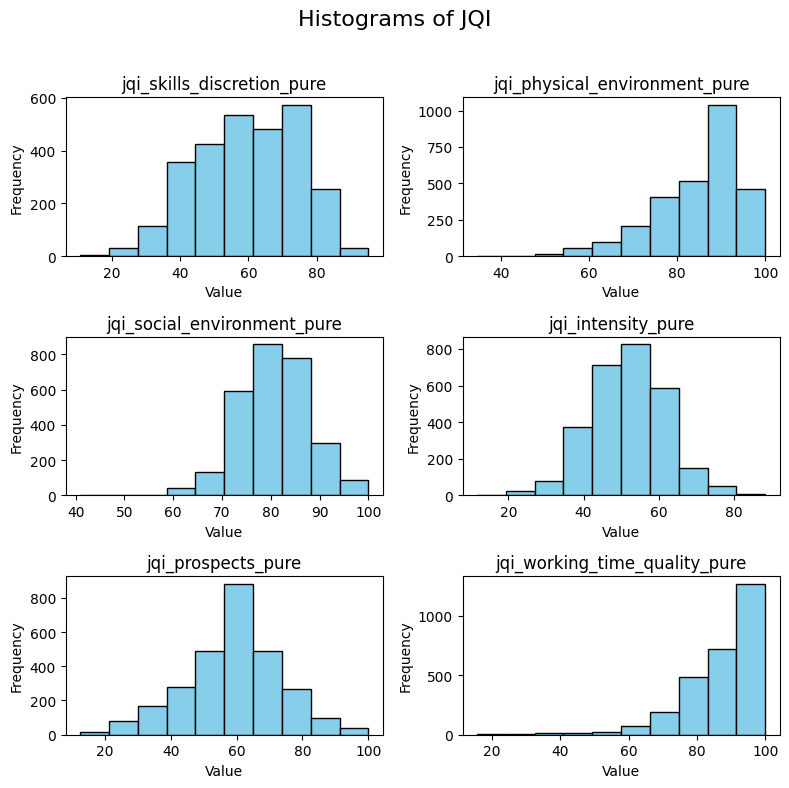

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
fig.suptitle("Histograms of JQI", fontsize=16)

axes = axes.flatten()

for i, column in enumerate(
    df[
        [
            "jqi_skills_discretion_pure",
            "jqi_physical_environment_pure",
            "jqi_social_environment_pure",
            "jqi_intensity_pure",
            "jqi_prospects_pure",
            "jqi_working_time_quality_pure",
        ]
    ].columns
):
    axes[i].hist(df[column], bins=10, color="skyblue", edgecolor="black")
    axes[i].set_title(column)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()